# **Spotify :**





**`Dataset Link`**       -- [Click Here](https://www.kaggle.com/code/ryanholbrook/binary-classification/data?select=spotify.csv)

**`Documentation`**      -- [Click Here](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-01-21)

**`LInkedIn`**           -- [Click Here](https://www.linkedin.com/in/praveen-n-2b4004223/)




**`Understand The Data`:**



```
                                [ Note : track == song ]

 # track_id                      : song unique Id

 # track_name                    : song name

 # track_artist                  : song artist

 # track_popularity              : song popularity (0-100) where higher is better one

 # track_album_id                :  song Album unique id

 # track_album_name              : song album name

 # track_album_release_date      : song album release date

 # playlist_name                 : name of playlist

 # playlist_id                   : playlist id

 # playlist_genre                : playlist genre

 # playlist_subgenre             : playlist sub genre

 # danceability                  : describes how suitable the song is for to dance based on combination of musical components  including tempo, rhythm stability, beat strength, and overall regularity.
                                 : a value of 0.0 is 'least danceable' and 1.0 is 'most danceable'.

 # energy                        : energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
                                 : energetic tracks feel fast, loud, and noisy.

 # Key                           : The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

 # loudness                      : sound of the track in decibels(db).

                                 : loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
              
                                 : values typical range between -60 and 0 db.

 # mode                           : mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
                                  : "major" is represented by 1 and "minor" is 0.

  # speechiness                   : speechiness detects the presence of spoken words in a track.
                                  1.the more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
                                  2.values above "0.66" describe tracks that are probably made entirely of "spoken words".
                                  3.values between "0.33 and 0.66" describe tracks that may contain "both music and speech", either in sections or layered, including such cases as rap music.
                                  4.values below 0.33 most likely represent "music and other non-speech-like tracks".

 # acousticness                  : a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
                                 : Acoustic music typically involves instruments like acoustic guitars, pianos, violins, and other non-electronic or non-synthesized instruments.

 # instrumentalness              : predicts whether a track contains no vocals"Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". (Music With no vocals)
                                 : the closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.(least 0.5 above)


 # liveness                       : detects the presence of an audience in the recording.
                                  1.higher liveness values represent an increased probability that the track was performed live.
                                  2.a value above 0.8 provides strong likelihood that the track is live.

 # valence                        : a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
                                   1. tracks with high valence sound more positive (e.g. happy, cheerful, euphoric).
                                   2. tracks with low valence sound more negative (e.g. sad, depressed, angry).

 # tempo                          : the overall estimated tempo of a track in beats per minute (BPM).
                                  1.in musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
 # duration_ms                    : Duration of song in milliseconds

```




## **Problem Statement: Predicting Popularity of Spotify Songs**

**Objective:**

```
 Build a regression model to predict the popularity of Spotify songs based on various audio and metadata features.
```



**Praveen's Idea About model Process:**



```
# In this datatset we have fetures that contains information about spotify songs including attributes like danceability , energy ,key ,
  loudness , mode , speechiness , instrumentalness , liveness , valence , tempo and duration.

# With these features I have created the regression model(ols) which takes these features as input and predicts popularity of song that is
  track_popularity as output scores ranging from 0 to 100.
```



### **EDA By Dataprep**

In [ ]:
import pandas as pd


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

df = pd.read_csv('/content/spotify.csv')

In [ ]:
# Installing dataprep Library
pip install dataprep

In [ ]:
from dataprep.eda import create_report

x = create_report(df)  # Report Creation

DataPrep Report
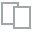
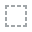
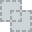
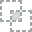
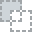
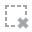
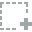
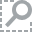
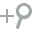
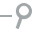
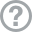
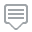
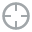
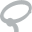
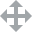
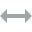
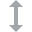
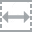
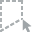
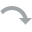
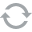
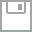
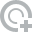
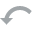
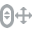
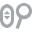
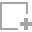
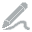
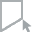
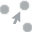
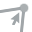
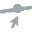

In [ ]:
x

# **Model Process**

### **PreProcessing**

In [ ]:
import pandas as pd


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

df = pd.read_csv('/content/spotify.csv')

In [ ]:
selected_features = df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','track_popularity']]

In [ ]:
selected_features.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  track_popularity  
0          0.000000    0.0653    0.518  122.036       194754                66  
1          0.004210    0.3570    0.693   99.972       162600                67  
2          0.000023    0.1100    0.613  124.008       176616                70  
3          0.000009    0.2040    0.277  121.956       169093                60  
4          0.000000    0.0833    0.725  123.976       189052                69

In [ ]:
selected_features.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
track_popularity    0
dtype: int64

In [ ]:
# Model Process before scaling

y = selected_features['track_popularity']

# independent variable

x1 = selected_features[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]

X = sm.add_constant(x1)

Model_bs = sm.OLS(y,X).fit()

Model_bs.summary()

In [ ]:
# Before Scaling
Model_bs.predict()

array([46.23947989, 46.00569731, 44.03886203, ..., 42.68978377,
       33.39514196, 27.9304407 ])

## **Scaling Process**

**Before Standardising Values(Scaling) :**

In [ ]:
selected_features.corr()

danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.086073  0.011736  0.025335 -0.058647   
energy               -0.086073  1.000000  0.010052  0.676625 -0.004800   
key                   0.011736  0.010052  1.000000  0.000959 -0.174093   
loudness              0.025335  0.676625  0.000959  1.000000 -0.019289   
mode                 -0.058647 -0.004800 -0.174093 -0.019289  1.000000   
speechiness           0.181721 -0.032150  0.022607  0.010339 -0.063512   
acousticness         -0.024519 -0.539745  0.004306 -0.361638  0.009415   
instrumentalness     -0.008655  0.033247  0.005968 -0.147824 -0.006741   
liveness             -0.123859  0.161223  0.002887  0.077613 -0.005549   
valence               0.330523  0.151103  0.019914  0.053384  0.002614   
tempo                -0.184084  0.149951 -0.013370  0.093767  0.014329   
duration_ms          -0.096879  0.012611  0.015139 -0.115058  0.015634   
track_popularity      0.064748 -0.109112 -0.000650  0.057687  0.010637   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.181721     -0.024519         -0.008655 -0.123859   
energy              -0.032150     -0.539745          0.033247  0.161223   
key                  0.022607      0.004306          0.005968  0.002887   
loudness             0.010339     -0.361638         -0.147824  0.077613   
mode                -0.063512      0.009415         -0.006741 -0.005549   
speechiness          1.000000      0.026092         -0.103424  0.055426   
acousticness         0.026092      1.000000         -0.006850 -0.077243   
instrumentalness    -0.103424     -0.006850          1.000000 -0.005507   
liveness             0.055426     -0.077243         -0.005507  1.000000   
valence              0.064659     -0.016845         -0.175402 -0.020560   
tempo                0.044603     -0.112724          0.023335  0.021018   
duration_ms         -0.089431     -0.081581          0.063235  0.006138   
track_popularity     0.006819      0.085159         -0.149872 -0.054584   

                   valence     tempo  duration_ms  track_popularity  
danceability      0.330523 -0.184084    -0.096879          0.064748  
energy            0.151103  0.149951     0.012611         -0.109112  
key               0.019914 -0.013370     0.015139         -0.000650  
loudness          0.053384  0.093767    -0.115058          0.057687  
mode              0.002614  0.014329     0.015634          0.010637  
speechiness       0.064659  0.044603    -0.089431          0.006819  
acousticness     -0.016845 -0.112724    -0.081581          0.085159  
instrumentalness -0.175402  0.023335     0.063235         -0.149872  
liveness         -0.020560  0.021018     0.006138         -0.054584  
valence           1.000000 -0.025732    -0.032225          0.033231  
tempo            -0.025732  1.000000    -0.001412         -0.005378  
duration_ms      -0.032225 -0.001412     1.000000         -0.143682  
track_popularity  0.033231 -0.005378    -0.143682          1.000000

In [ ]:
from tabulate import tabulate

summary = []

for column in selected_features.columns:
  Mean = selected_features[column].mean()
  Std  = selected_features[column].std()
  summary.append([column,Mean,Std])

summary # Summary of mean and standard deviation of each feature.

summary_data  = pd.DataFrame(summary,columns=['Feature','Mean','Standard Deviation'])

table = tabulate(summary_data,headers='keys',tablefmt='grid')

print(table) # To view the data in Structured format

+----+------------------+----------------+----------------------+
|    | Feature          |           Mean |   Standard Deviation |
+====+==================+================+======================+
|  0 | danceability     |      0.65485   |             0.145085 |
+----+------------------+----------------+----------------------+
|  1 | energy           |      0.698619  |             0.18091  |
+----+------------------+----------------+----------------------+
|  2 | key              |      5.37447   |             3.61166  |
+----+------------------+----------------+----------------------+
|  3 | loudness         |     -6.7195    |             2.98844  |
+----+------------------+----------------+----------------------+
|  4 | mode             |      0.565711  |             0.495671 |
+----+------------------+----------------+----------------------+
|  5 | speechiness      |      0.107068  |             0.101314 |
+----+------------------+----------------+----------------------+
|  6 | aco

**After Standardizing Values:**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler() # Intializinf the Scaler

# Fit process of input features
scaler.fit(selected_features[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])

scaled_features = scaler.transform(selected_features[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])


In [ ]:
selected_features[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']] = scaled_features

<ipython-input-161-65837e337d34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']] = scaled_features


In [ ]:
selected_features.head()

danceability    energy       key  loudness      mode  speechiness  \
0      0.642049  1.201614  0.173200  1.367123  0.876177    -0.481362   
1      0.490412  0.643317  1.557627  0.585766  0.876177    -0.688642   
2      0.138889  1.284529 -1.211227  1.100090 -1.141322    -0.324422   
3      0.435271  1.279002  0.450085  0.984309  0.876177    -0.050024   
4     -0.033426  0.742815 -1.211227  0.685151  0.876177    -0.702460   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0     -0.333898         -0.377953 -0.809230  0.031908  0.042927    -0.518874   
1     -0.468670         -0.359177  1.081061  0.782522 -0.777198    -1.056268   
2     -0.436799         -0.377849 -0.519562  0.439384  0.116227    -0.822017   
3     -0.667642         -0.377911  0.089582 -1.001795  0.039953    -0.947750   
4     -0.432701         -0.377953 -0.692585  0.919777  0.115037    -0.614172   

   track_popularity  
0                66  
1                67  
2                70  
3                60  
4                69

In [ ]:
# Mean and std Checking

import pandas as pd
from tabulate import tabulate

summary_data = []
for col in selected_features.columns:
    mean = selected_features[col].mean()
    std = selected_features[col].std()
    summary_data.append([col, mean, std])

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_data, columns=['Feature', 'Mean', 'Std'])

# Format the table using tabulate
table = tabulate(summary_df, headers='keys', tablefmt='grid')

print(table)


+----+------------------+--------------+----------+
|    | Feature          |         Mean |      Std |
+====+==================+==============+==========+
|  0 | danceability     |  1.38503e-16 |  1.00002 |
+----+------------------+--------------+----------+
|  1 | energy           |  4.03174e-16 |  1.00002 |
+----+------------------+--------------+----------+
|  2 | key              | -8.33048e-17 |  1.00002 |
+----+------------------+--------------+----------+
|  3 | loudness         |  1.44995e-17 |  1.00002 |
+----+------------------+--------------+----------+
|  4 | mode             | -6.24887e-17 |  1.00002 |
+----+------------------+--------------+----------+
|  5 | speechiness      | -1.18269e-16 |  1.00002 |
+----+------------------+--------------+----------+
|  6 | acousticness     |  4.37151e-17 |  1.00002 |
+----+------------------+--------------+----------+
|  7 | instrumentalness | -7.87196e-17 |  1.00002 |
+----+------------------+--------------+----------+
|  8 | liven

In [ ]:
selected_features.corr() # After Scaled

danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.086073  0.011736  0.025335 -0.058647   
energy               -0.086073  1.000000  0.010052  0.676625 -0.004800   
key                   0.011736  0.010052  1.000000  0.000959 -0.174093   
loudness              0.025335  0.676625  0.000959  1.000000 -0.019289   
mode                 -0.058647 -0.004800 -0.174093 -0.019289  1.000000   
speechiness           0.181721 -0.032150  0.022607  0.010339 -0.063512   
acousticness         -0.024519 -0.539745  0.004306 -0.361638  0.009415   
instrumentalness     -0.008655  0.033247  0.005968 -0.147824 -0.006741   
liveness             -0.123859  0.161223  0.002887  0.077613 -0.005549   
valence               0.330523  0.151103  0.019914  0.053384  0.002614   
tempo                -0.184084  0.149951 -0.013370  0.093767  0.014329   
duration_ms          -0.096879  0.012611  0.015139 -0.115058  0.015634   
track_popularity      0.064748 -0.109112 -0.000650  0.057687  0.010637   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.181721     -0.024519         -0.008655 -0.123859   
energy              -0.032150     -0.539745          0.033247  0.161223   
key                  0.022607      0.004306          0.005968  0.002887   
loudness             0.010339     -0.361638         -0.147824  0.077613   
mode                -0.063512      0.009415         -0.006741 -0.005549   
speechiness          1.000000      0.026092         -0.103424  0.055426   
acousticness         0.026092      1.000000         -0.006850 -0.077243   
instrumentalness    -0.103424     -0.006850          1.000000 -0.005507   
liveness             0.055426     -0.077243         -0.005507  1.000000   
valence              0.064659     -0.016845         -0.175402 -0.020560   
tempo                0.044603     -0.112724          0.023335  0.021018   
duration_ms         -0.089431     -0.081581          0.063235  0.006138   
track_popularity     0.006819      0.085159         -0.149872 -0.054584   

                   valence     tempo  duration_ms  track_popularity  
danceability      0.330523 -0.184084    -0.096879          0.064748  
energy            0.151103  0.149951     0.012611         -0.109112  
key               0.019914 -0.013370     0.015139         -0.000650  
loudness          0.053384  0.093767    -0.115058          0.057687  
mode              0.002614  0.014329     0.015634          0.010637  
speechiness       0.064659  0.044603    -0.089431          0.006819  
acousticness     -0.016845 -0.112724    -0.081581          0.085159  
instrumentalness -0.175402  0.023335     0.063235         -0.149872  
liveness         -0.020560  0.021018     0.006138         -0.054584  
valence           1.000000 -0.025732    -0.032225          0.033231  
tempo            -0.025732  1.000000    -0.001412         -0.005378  
duration_ms      -0.032225 -0.001412     1.000000         -0.143682  
track_popularity  0.033231 -0.005378    -0.143682          1.000000

**Correlation Comaprision B/w Before And After Scaling**

**`Before Scaling`**

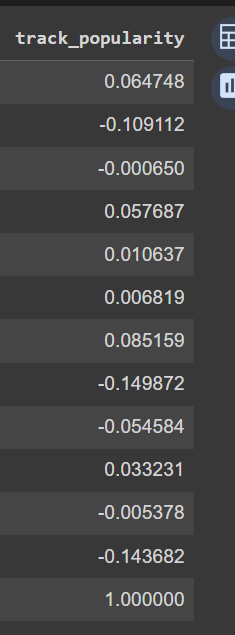

**`After Scaling`**

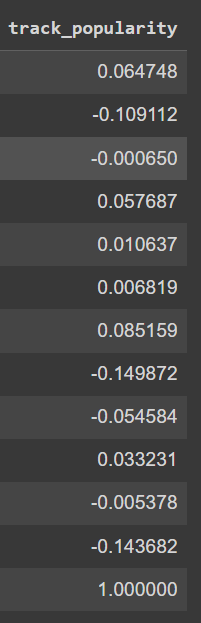


**Note : No Changes In Correlation**

### **Model Training :**


**Note :**


```
# I have Selected ordinary least squares Algoritm or math .
```



In [ ]:
# Required Libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm

**Dependent and Indepdendent variables**

In [ ]:
selected_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'track_popularity'],
      dtype='object')

In [ ]:
# Dependent Variable

y = selected_features['track_popularity']

# independent variable

x1 = selected_features[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]

In [ ]:
X = sm.add_constant(x1)

# X # Temporary Constant

In [ ]:
# Model Creation and Trained

Model = sm.OLS(y,X).fit()
Model

In [ ]:
# Summary of the Model

Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:24:40   Log-Likelihood:            -1.5102e+05
No. Observations:               32833   AIC:                         3.021e+05
Df Residuals:                   32820   BIC:                         3.022e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               42.4771      0.133    319.773      0.000      42.217      42.737
danceability         0.7316      0.152      4.809      0.000       0.433       1.030
energy              -5.3402      0.217    -24.642      0.000      -5.765      -4.915
key                  0.1542      0.135      1.143      0.253      -0.110       0.419
loudness             4.5563      0.192     23.764      0.000       4.181       4.932
mode                 0.3557      0.135      2.627      0.009       0.090       0.621
speechiness         -0.7349      0.137     -5.348      0.000      -1.004      -0.466
acousticness         0.7077      0.161      4.402      0.000       0.393       1.023
instrumentalness    -2.6861      0.141    -19.005      0.000      -2.963      -2.409
liveness            -0.6655      0.136     -4.890      0.000      -0.932      -0.399
valence              0.6489      0.150      4.340      0.000       0.356       0.942
tempo                0.5728      0.137      4.171      0.000       0.304       0.842
duration_ms         -2.7475      0.136    -20.170      0.000      -3.014      -2.480
==============================================================================
Omnibus:                     3799.122   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.195
Skew:                          -0.289   Prob(JB):                    6.69e-309
Kurtosis:                       2.161   Cond. No.                         3.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Model Prediction**

In [ ]:
# Actually Coeffecients

Model.params[0] # Constant

42.47708098559374

In [ ]:
x1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
Y_pred = Model.params[0] + (Model.params[1] * x1['danceability']) + (Model.params[2] * x1['energy']) + (Model.params[3] * x1['key'])  + (Model.params[4] * x1['loudness']) + \
          (Model.params[5] * x1['mode']) + (Model.params[6] * x1['speechiness']) + (Model.params[7] * x1['acousticness']) + (Model.params[8] * x1['instrumentalness']) + \
          (Model.params[9] * x1['liveness']) + (Model.params[10] * x1['valence']) + (Model.params[11] * x1['tempo']) +  (Model.params[12] * x1['duration_ms'])


In [ ]:
Y_pred # Manually Substitution prediction

In [ ]:
Model.predict()

array([46.23947989, 46.00569731, 44.03886203, ..., 42.68978377,
       33.39514196, 27.9304407 ])